In [2]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")
#sns.set(rc={'figure.figsize':(8,6)}) # adjust figure size

#%precision 2

pd.set_option('max_columns',200)

# modeling packages
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read csv file -- contact object_new
contact = pd.read_csv('DP- Contact Object 07-22-21.csv')

# read csv file -- successful/unsuccessful students
successful = pd.read_csv('successful_students.csv')
unsuccessful = pd.read_csv('unsuccessful_students.csv')

In [3]:
contact.head()
#contact.info()
#contact.columns

,Id,Birthdate,Actual_College_Graduation_Date__c,College_Credits_Accumulated__c,College_Graduated_From__c,College_Major__c,College_Minor__c,Cumulative_College_GPA__c,Total_Credits_Required_to_Graduate__c,Pell_Eligible__c,Latest_Transcript__c,Latest_FAFSA_Date__c,Last_Successful_Contact__c,Last_Outreach__c,HS_Final_GPA__c,HS_Class__c,Highest_ACT_Score__c,Currently_Enrolled_At__c,Ethnicity__c,First_Generation_College_Student__c,Gender__c,EFC_from_FAFSA__c,Semester_1_GPA__c,Semester_2_GPA__c,Semester_3_GPA__c,Semester_4_GPA__c,Semester_5_GPA__c,Semester_6_GPA__c,Semester_7_GPA__c,Semester_8_GPA__c,Semester_9_GPA__c,Proposed_College_Major__c,Semester_10_Credits__c,Semester_11_Credits__c,Semester_12_Credits__c,Semester_1_Credits__c,Semester_2_Credits__c,Semester_3_Credits__c,Semester_4_Credits__c,Semester_5_Credits__c,Semester_6_Credits__c,Semester_7_Credits__c,Semester_8_Credits__c,Semester_9_Credits__c,Career_Path__c,College_Path__c,High_School_Graduated_From__c,PAC_Mentee__c,Stage__c,Career_Cluster_Matches__c,Active_T_Mobile_Plan__c,Column1
0,00346000002iXekAAE,5/2/1996 0:00,6/1/2017 0:00,48.0,NaN,Computer Science,NaN,2.29,120.0,0,1/6/2017 0:00,1/1/1900,2/7/2019 0:00,11/5/2018 0:00,3.33,2014.0,25.0,NaN,African American,0,Male,1264.0,0.30,3.75,3.31,2.60,2.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,12.0,13.0,6.0,8.0,NaN,NaN,NaN,NaN,0,1,NaN,NaN,8. Graduate of Program,NaN,1.0,NaN
1,00346000002iXcbAAE,1/23/1995 0:00,10/4/2019 0:00,6.0,Year UP,NaN,NaN,1.10,120.0,0,5/20/2015 0:00,1/7/2016 0:00,10/4/2019 0:00,4/29/2019 0:00,1.98,2014.0,13.0,NaN,African American,0,Female,0.0,1.67,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,NaN,NaN,8. Graduate of Program,NaN,0.0,NaN
2,00346000002iXbiAAE,11/19/1996 0:00,9/11/2018 0:00,39.0,Year UP,Communications,NaN,1.92,120.0,0,12/29/2016 0:00,1/1/1900,9/11/2018 0:00,2/5/2019 0:00,2.50,2015.0,18.0,NaN,African American,0,Male,24170.0,2.10,1.88,1.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,12.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,1,0,NaN,NaN,8. Graduate of Program,NaN,0.0,NaN
3,00346000002iXaSAAU,3/20/1995 0:00,5/18/2018 0:00,108.0,NaN,"Recreation, Sport, and Tourism",Scuba,3.51,120.0,0,1/12/2018 0:00,1/1/1900,3/23/2017 0:00,3/23/2017 0:00,2.87,2014.0,20.0,NaN,African American,0,Female,0.0,3.67,3.78,3.63,3.46,3.49,3.47,3.67,NaN,NaN,NaN,NaN,NaN,NaN,16.0,11.0,14.0,17.0,12.0,13.0,NaN,NaN,NaN,0,1,NaN,NaN,8. Graduate of Program,Human Services;Business Management & Administr...,1.0,NaN
4,00346000002iXaWAAU,8/5/1996 0:00,5/11/2019 0:00,124.0,Western Illinois University,"Arts, Media, and Entertainment",NaN,2.51,120.0,0,1/14/2019 0:00,1/1/1900,1/7/2019 0:00,3/15/2018 0:00,2.46,2014.0,21.0,NaN,African American,0,Male,0.0,1.92,2.23,2.22,2.24,2.20,2.12,2.67,NaN,3.6,NaN,15.0,NaN,NaN,10.0,8.0,13.0,13.0,11.0,12.0,NaN,NaN,15.0,0,1,NaN,NaN,8. Graduate of Program,Education;Business Management & Administration...,0.0,NaN


In [4]:
# creating dummies for gender
# male --> 1 & female --> 0
contact['Gender__c'] = contact['Gender__c'].map({'Male':1, 'Female':0})

In [5]:
contact.head()

,Id,Birthdate,Actual_College_Graduation_Date__c,College_Credits_Accumulated__c,College_Graduated_From__c,College_Major__c,College_Minor__c,Cumulative_College_GPA__c,Total_Credits_Required_to_Graduate__c,Pell_Eligible__c,Latest_Transcript__c,Latest_FAFSA_Date__c,Last_Successful_Contact__c,Last_Outreach__c,HS_Final_GPA__c,HS_Class__c,Highest_ACT_Score__c,Currently_Enrolled_At__c,Ethnicity__c,First_Generation_College_Student__c,Gender__c,EFC_from_FAFSA__c,Semester_1_GPA__c,Semester_2_GPA__c,Semester_3_GPA__c,Semester_4_GPA__c,Semester_5_GPA__c,Semester_6_GPA__c,Semester_7_GPA__c,Semester_8_GPA__c,Semester_9_GPA__c,Proposed_College_Major__c,Semester_10_Credits__c,Semester_11_Credits__c,Semester_12_Credits__c,Semester_1_Credits__c,Semester_2_Credits__c,Semester_3_Credits__c,Semester_4_Credits__c,Semester_5_Credits__c,Semester_6_Credits__c,Semester_7_Credits__c,Semester_8_Credits__c,Semester_9_Credits__c,Career_Path__c,College_Path__c,High_School_Graduated_From__c,PAC_Mentee__c,Stage__c,Career_Cluster_Matches__c,Active_T_Mobile_Plan__c,Column1
0,00346000002iXekAAE,5/2/1996 0:00,6/1/2017 0:00,48.0,NaN,Computer Science,NaN,2.29,120.0,0,1/6/2017 0:00,1/1/1900,2/7/2019 0:00,11/5/2018 0:00,3.33,2014.0,25.0,NaN,African American,0,1.0,1264.0,0.30,3.75,3.31,2.60,2.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,12.0,13.0,6.0,8.0,NaN,NaN,NaN,NaN,0,1,NaN,NaN,8. Graduate of Program,NaN,1.0,NaN
1,00346000002iXcbAAE,1/23/1995 0:00,10/4/2019 0:00,6.0,Year UP,NaN,NaN,1.10,120.0,0,5/20/2015 0:00,1/7/2016 0:00,10/4/2019 0:00,4/29/2019 0:00,1.98,2014.0,13.0,NaN,African American,0,0.0,0.0,1.67,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,NaN,NaN,8. Graduate of Program,NaN,0.0,NaN
2,00346000002iXbiAAE,11/19/1996 0:00,9/11/2018 0:00,39.0,Year UP,Communications,NaN,1.92,120.0,0,12/29/2016 0:00,1/1/1900,9/11/2018 0:00,2/5/2019 0:00,2.50,2015.0,18.0,NaN,African American,0,1.0,24170.0,2.10,1.88,1.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,12.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,1,0,NaN,NaN,8. Graduate of Program,NaN,0.0,NaN
3,00346000002iXaSAAU,3/20/1995 0:00,5/18/2018 0:00,108.0,NaN,"Recreation, Sport, and Tourism",Scuba,3.51,120.0,0,1/12/2018 0:00,1/1/1900,3/23/2017 0:00,3/23/2017 0:00,2.87,2014.0,20.0,NaN,African American,0,0.0,0.0,3.67,3.78,3.63,3.46,3.49,3.47,3.67,NaN,NaN,NaN,NaN,NaN,NaN,16.0,11.0,14.0,17.0,12.0,13.0,NaN,NaN,NaN,0,1,NaN,NaN,8. Graduate of Program,Human Services;Business Management & Administr...,1.0,NaN
4,00346000002iXaWAAU,8/5/1996 0:00,5/11/2019 0:00,124.0,Western Illinois University,"Arts, Media, and Entertainment",NaN,2.51,120.0,0,1/14/2019 0:00,1/1/1900,1/7/2019 0:00,3/15/2018 0:00,2.46,2014.0,21.0,NaN,African American,0,1.0,0.0,1.92,2.23,2.22,2.24,2.20,2.12,2.67,NaN,3.6,NaN,15.0,NaN,NaN,10.0,8.0,13.0,13.0,11.0,12.0,NaN,NaN,15.0,0,1,NaN,NaN,8. Graduate of Program,Education;Business Management & Administration...,0.0,NaN


In [6]:
# pivot label tabel
# successful --> 1 & unsuccessful --> 0
successful['successful'] = 1
unsuccessful['successful'] = 0
label = pd.concat([successful, unsuccessful])

In [7]:
# chnage column name for further merge
label.columns= ['Id', 'label']

In [8]:
# get a new dataframe with labels
contact_with_labels = contact.merge(label, on='Id', how='inner')

In [9]:
# save to csv file
contact_with_labels.to_csv('contact_with_labels.csv', index = False)

In [10]:
contact_with_labels.head(1)

,Id,Birthdate,Actual_College_Graduation_Date__c,College_Credits_Accumulated__c,College_Graduated_From__c,College_Major__c,College_Minor__c,Cumulative_College_GPA__c,Total_Credits_Required_to_Graduate__c,Pell_Eligible__c,Latest_Transcript__c,Latest_FAFSA_Date__c,Last_Successful_Contact__c,Last_Outreach__c,HS_Final_GPA__c,HS_Class__c,Highest_ACT_Score__c,Currently_Enrolled_At__c,Ethnicity__c,First_Generation_College_Student__c,Gender__c,EFC_from_FAFSA__c,Semester_1_GPA__c,Semester_2_GPA__c,Semester_3_GPA__c,Semester_4_GPA__c,Semester_5_GPA__c,Semester_6_GPA__c,Semester_7_GPA__c,Semester_8_GPA__c,Semester_9_GPA__c,Proposed_College_Major__c,Semester_10_Credits__c,Semester_11_Credits__c,Semester_12_Credits__c,Semester_1_Credits__c,Semester_2_Credits__c,Semester_3_Credits__c,Semester_4_Credits__c,Semester_5_Credits__c,Semester_6_Credits__c,Semester_7_Credits__c,Semester_8_Credits__c,Semester_9_Credits__c,Career_Path__c,College_Path__c,High_School_Graduated_From__c,PAC_Mentee__c,Stage__c,Career_Cluster_Matches__c,Active_T_Mobile_Plan__c,Column1,label
0,00346000002iXekAAE,5/2/1996 0:00,6/1/2017 0:00,48.0,NaN,Computer Science,NaN,2.29,120.0,0,1/6/2017 0:00,1/1/1900,2/7/2019 0:00,11/5/2018 0:00,3.33,2014.0,25.0,NaN,African American,0,1.0,1264.0,0.3,3.75,3.31,2.6,2.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,12.0,13.0,6.0,8.0,NaN,NaN,NaN,NaN,0,1,NaN,NaN,8. Graduate of Program,NaN,1.0,NaN,0


In [11]:
# select independent variables
# first try, modified after looking at correlation matrix
# contactSmall = contact[['Id','Cumulative_College_GPA__c','Pell_Eligible__c', 'HS_Final_GPA__c', 'Highest_ACT_Score__c', 'First_Generation_College_Student__c', 'Active_T_Mobile_Plan__c']]

#second try (numerical variables only)
contactNum = contact_with_labels[['Id','College_Credits_Accumulated__c','Cumulative_College_GPA__c','Total_Credits_Required_to_Graduate__c', 
                                  'Pell_Eligible__c','HS_Final_GPA__c', 'Highest_ACT_Score__c', 'First_Generation_College_Student__c', 'Gender__c', 
                                  'EFC_from_FAFSA__c', 'Career_Path__c', 'College_Path__c', 'Active_T_Mobile_Plan__c', 'label']]

In [12]:
contactNum.head()

,Id,College_Credits_Accumulated__c,Cumulative_College_GPA__c,Total_Credits_Required_to_Graduate__c,Pell_Eligible__c,HS_Final_GPA__c,Highest_ACT_Score__c,First_Generation_College_Student__c,Gender__c,EFC_from_FAFSA__c,Career_Path__c,College_Path__c,Active_T_Mobile_Plan__c,label
0,00346000002iXekAAE,48.0,2.29,120.0,0,3.33,25.0,0,1.0,1264.0,0,1,1.0,0
1,00346000002iXcbAAE,6.0,1.10,120.0,0,1.98,13.0,0,0.0,0.0,1,0,0.0,0
2,00346000002iXbiAAE,39.0,1.92,120.0,0,2.50,18.0,0,1.0,24170.0,1,0,0.0,0
3,00346000002iXaSAAU,108.0,3.51,120.0,0,2.87,20.0,0,0.0,0.0,0,1,1.0,1
4,00346000002iXaWAAU,124.0,2.51,120.0,0,2.46,21.0,0,1.0,0.0,0,1,0.0,1


In [13]:
df = contactNum.dropna() # there are still some NULLS, remove all

In [14]:
df.head()

,Id,College_Credits_Accumulated__c,Cumulative_College_GPA__c,Total_Credits_Required_to_Graduate__c,Pell_Eligible__c,HS_Final_GPA__c,Highest_ACT_Score__c,First_Generation_College_Student__c,Gender__c,EFC_from_FAFSA__c,Career_Path__c,College_Path__c,Active_T_Mobile_Plan__c,label
0,00346000002iXekAAE,48.0,2.29,120.0,0,3.33,25.0,0,1.0,1264.0,0,1,1.0,0
1,00346000002iXcbAAE,6.0,1.10,120.0,0,1.98,13.0,0,0.0,0.0,1,0,0.0,0
2,00346000002iXbiAAE,39.0,1.92,120.0,0,2.50,18.0,0,1.0,24170.0,1,0,0.0,0
3,00346000002iXaSAAU,108.0,3.51,120.0,0,2.87,20.0,0,0.0,0.0,0,1,1.0,1
4,00346000002iXaWAAU,124.0,2.51,120.0,0,2.46,21.0,0,1.0,0.0,0,1,0.0,1


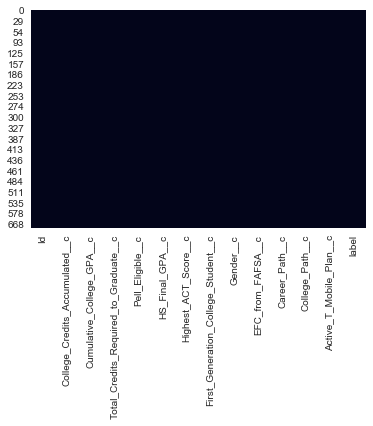

In [15]:
sns.heatmap(df.isnull(), cbar=False)

## Correlation matrix (for numerical variables)

(13.5, -0.5)

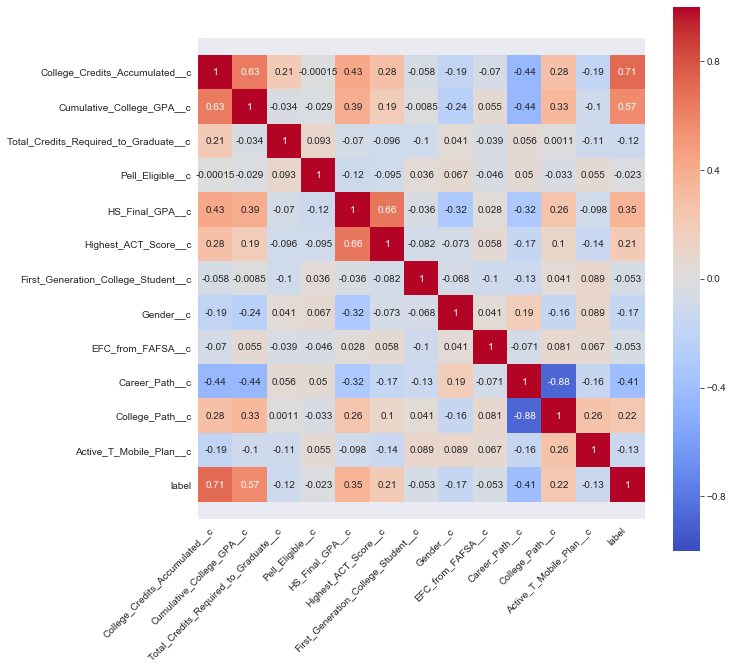

In [16]:
# Correlations
corr = df.corr()

f, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap="coolwarm",
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

**We found that**
- 'EFC_from FAFSA' has little correlation with dependent variable
- 'First_generation_college_student' has little correlation with dependent variable
- 'Pell_Eligible' has little correlation with dependent variable
- 'career path' and 'college path' are highly negatively correlated (-0.88)
- 'HS_Final_GPA' and 'Highest_ACT_Score' are highly postively correlated (0.66)
- 'college_credits_accumulated' and 'cumulative_college_GPA' are highly postively correlated (0.63)

## VIF (for numerical variables)

In [17]:
# check vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# the independent variables set
X = df[['College_Credits_Accumulated__c','Cumulative_College_GPA__c','Total_Credits_Required_to_Graduate__c', 
        'Pell_Eligible__c','HS_Final_GPA__c', 'Highest_ACT_Score__c', 'First_Generation_College_Student__c', 
        'Gender__c','EFC_from_FAFSA__c', 'Career_Path__c', 'College_Path__c', 'Active_T_Mobile_Plan__c']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

In [18]:
print(vif_data)

                                  feature        VIF
0          College_Credits_Accumulated__c   4.968206
1               Cumulative_College_GPA__c   8.916556
2   Total_Credits_Required_to_Graduate__c  24.506974
3                        Pell_Eligible__c   1.053130
4                         HS_Final_GPA__c  59.635494
5                    Highest_ACT_Score__c  53.974090
6     First_Generation_College_Student__c   1.663701
7                               Gender__c   1.905247
8                       EFC_from_FAFSA__c   1.222945
9                          Career_Path__c   7.859484
10                        College_Path__c  12.606911
11                Active_T_Mobile_Plan__c   2.638037


**A rule of thumb for interpreting the variance inflation factor (VIF):**
- 1 = not correlated.
- Between 1 and 5 = moderately correlated.
- Greater than 5 = highly correlated.
- In general, a VIF above 10 indicates high correlation and is cause for concern. 

**We found that**
- 'HS_Final_GPA__c' and 'Highest_ACT_Score__c' are highly correlated
- 'career path' and 'college path'are highly correlated
- 'Total_Credits_Required_to_Graduate__c' should be removed

## Mosaic plots (for categorical variables)

In [19]:
# import packages
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

### Mosaic plot for majors

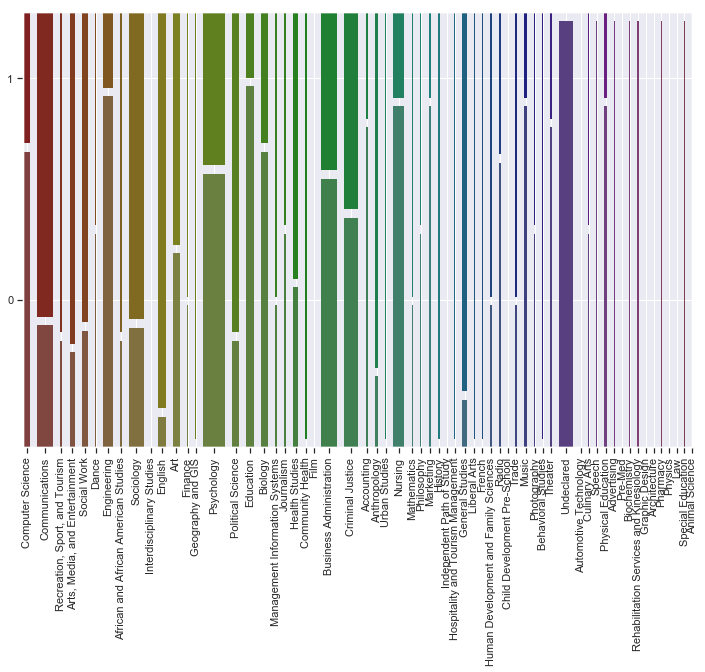

In [20]:
sns.set(rc={'figure.figsize':(12,8)}) # adjust figure size
mosaic(contact_with_labels, ['College_Major__c','label'],label_rotation = [90,0], gap=0.03, labelizer=lambda k: '')
plt.show()

In [21]:
crosstable = pd.crosstab(contact_with_labels['College_Major__c'], contact_with_labels['label'])
# pd.set_option('display.max_rows', None)
crosstable

label,0,1
College_Major__c,,
Accounting,3,1
Advertising,1,0
African and African American Studies,1,3
Animal Science,1,0
Anthropology,1,5
...,...,...
Speech,1,0
Theater,3,1
Trade,1,2


**conclusion: too many categories. The sample size of each major is small. Not include**

### Mosaic plot for ethnicity

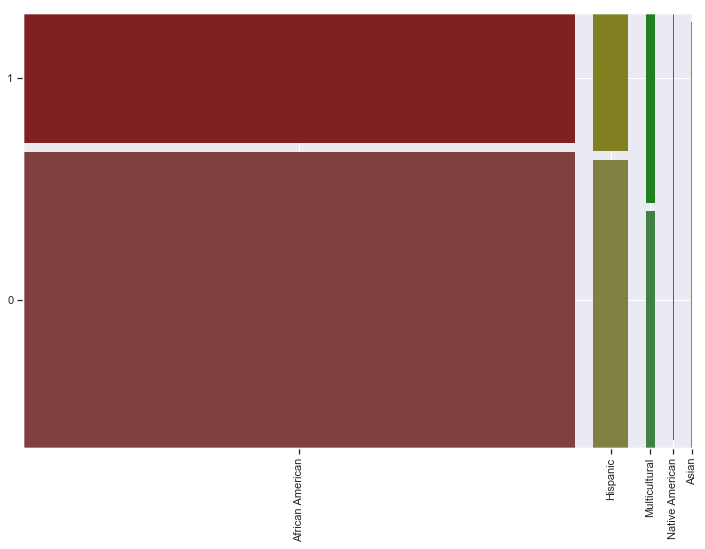

In [22]:
# this is a mosaic plot for ethnicity
sns.set(rc={'figure.figsize':(12, 8)}) # adjust figure size
mosaic(contact_with_labels, 
       ['Ethnicity__c','label'], 
       label_rotation = [90,0], 
       gap=0.03, 
       labelizer=lambda k: '')
plt.show()

**conclusion: has little correlation, no need to encode and include**

### Mosaic plot for genders

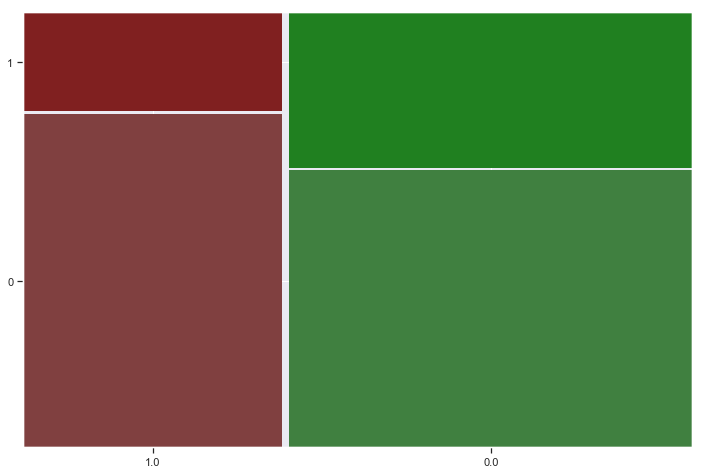

In [23]:
# this is a mosaic plot for gender
# x-axis: 1 --> male & 0 --> female
# y-axis: 1 --> successful & 0 --> unsuccessful
sns.set(rc={'figure.figsize':(12, 8)}) # adjust figure size
mosaic(contact_with_labels, ['Gender__c','label'], gap=0.01, labelizer=lambda k: '')
plt.show()

**We saw some correlations: female students tend to be more likely successful in the end**

## Feature selection for model building

- remove 'EFC_from_FAFSA__c'(little correlation)
- remove 'HS_Final_GPA__c' & 'College_path__c' (multicollinearity)

## First Model -- logistic regression

In [24]:
# import packages
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [93]:
# select features
# X = df[['College_Credits_Accumulated__c','Cumulative_College_GPA__c', 
#         'HS_Final_GPA__c', 'Highest_ACT_Score__c', 'Gender__c', 
#         'Career_Path__c', 'Active_T_Mobile_Plan__c']]

X = df[['Cumulative_College_GPA__c','HS_Final_GPA__c','Gender__c','Career_Path__c', 'Active_T_Mobile_Plan__c']]
y = df.label

In [94]:
# split data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [95]:
# Scaling the dataset
from sklearn.preprocessing import MinMaxScaler

# Fit the data on training
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X_train)

# transform data on training and testing
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### model building

In [96]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

### fit model and predict

In [97]:
# fit the model with data
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [98]:
y_pred=logreg.predict(X_test)

### evaluate

In [99]:
# evaluate
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[71, 13],
       [20, 25]])

Text(0.5, 384.16, 'Predicted label')

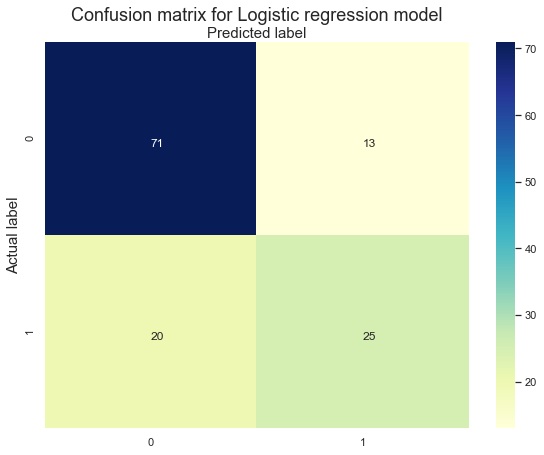

In [100]:
sns.set(rc={'figure.figsize':(8,6)}) # adjust figure size
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
annot_kws = {"ha": 'left',"va": 'top'}
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws=annot_kws, cmap="YlGnBu" ,fmt='g')

#sns.heatmap(cnf_matrix/np.sum(cnf_matrix), annot=True, fmt='.2%', cmap='Blues') # this is for percentage

bottom, top = ax.get_ylim()
ax.set_ylim(bottom, top)

ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Logistic regression model', fontsize=18)
plt.ylabel('Actual label', fontsize=15)
plt.xlabel('Predicted label', fontsize=15)

In [101]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7441860465116279
Precision: 0.6578947368421053
Recall: 0.5555555555555556


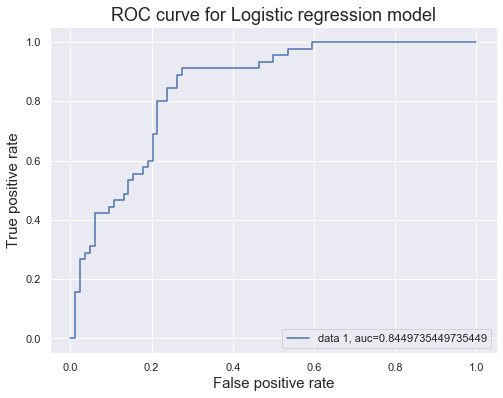

In [102]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False positive rate', fontsize =15)
plt.ylabel('True positive rate', fontsize =15)
plt.title('ROC curve for Logistic regression model', fontsize =18)
plt.show()

### important features

Feature: 0, Score: 3.41350
Feature: 1, Score: 0.47735
Feature: 2, Score: -0.46253
Feature: 3, Score: -1.97679
Feature: 4, Score: -0.89505


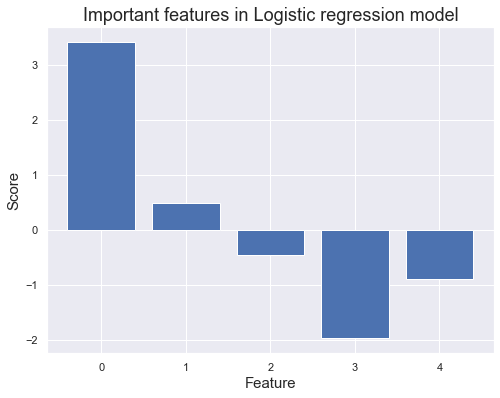

In [103]:
# plotting feature importances
importance = logreg.coef_[0]

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)

plt.xlabel('Feature', fontsize =15)
plt.ylabel('Score', fontsize =15)
plt.title('Important features in Logistic regression model', fontsize =18)
plt.show()

In [104]:
# Here are the most important features
# X.iloc[:, [0,1,5,6,4,3,2]].head(5)
X.iloc[:, [0,3,4,1,2]].head(5)

,Cumulative_College_GPA__c,Career_Path__c,Active_T_Mobile_Plan__c,HS_Final_GPA__c,Gender__c
0,2.29,0,1.0,3.33,1.0
1,1.10,1,0.0,1.98,0.0
2,1.92,1,0.0,2.50,1.0
3,3.51,0,1.0,2.87,0.0
4,2.51,0,0.0,2.46,1.0


## Second Model  -- XGBoost

In [37]:
# import package
from xgboost import XGBClassifier

### model building

In [105]:
xgb = XGBClassifier()

### fit model ad predict

In [106]:
# fit the model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
# make predictions for test data
y_pred = xgb.predict(X_test)

[10:56:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


### evaluate

In [107]:
# evaluate
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[70, 14],
       [16, 29]])

Text(0.5, 384.16, 'Predicted label')

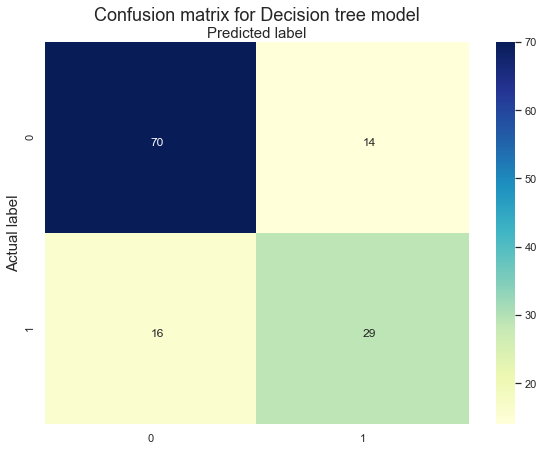

In [108]:
sns.set(rc={'figure.figsize':(8,6)}) # adjust figure size
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
annot_kws = {"ha": 'left',"va": 'top'}
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws=annot_kws, cmap="YlGnBu" ,fmt='g')

#sns.heatmap(cnf_matrix/np.sum(cnf_matrix), annot=True, fmt='.2%', cmap='Blues') # this is for percentage

bottom, top = ax.get_ylim()
ax.set_ylim(bottom, top)

ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Decision tree model', fontsize=18)
plt.ylabel('Actual label', fontsize=15)
plt.xlabel('Predicted label', fontsize=15)

In [109]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7674418604651163
Precision: 0.6744186046511628
Recall: 0.6444444444444445


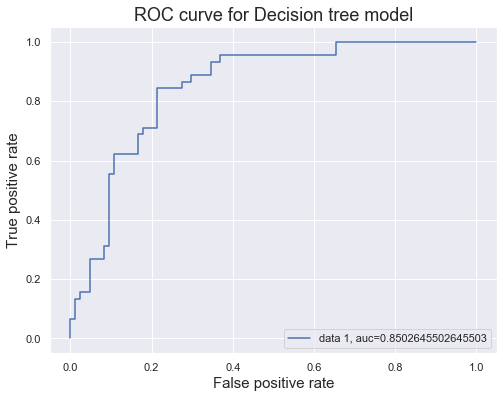

In [110]:
y_pred_proba = xgb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.xlabel('False positive rate', fontsize =15)
plt.ylabel('True positive rate', fontsize =15)
plt.title('ROC curve for Decision tree model', fontsize =18)
plt.show()

### important features

Feature: 0, Score: 0.32797
Feature: 1, Score: 0.10758
Feature: 2, Score: 0.09451
Feature: 3, Score: 0.28625
Feature: 4, Score: 0.18370


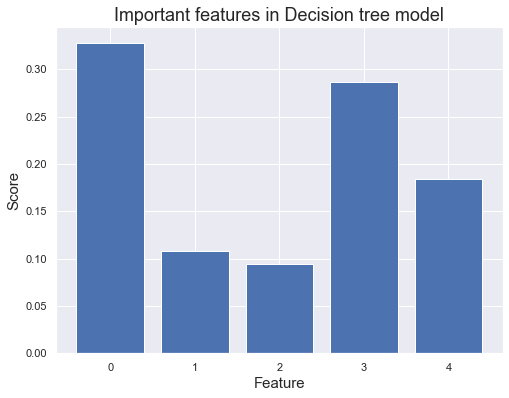

In [113]:
# plotting feature importances
importance = xgb.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)

plt.xlabel('Feature', fontsize =15)
plt.ylabel('Score', fontsize =15)
plt.title('Important features in Decision tree model', fontsize =18)
plt.show()

plt.show()

In [112]:
# Here are the most important features
# X.iloc[:, [0,1,5,3,2,6,4]].head(5)
X.iloc[:, [0,3,4,1,2]].head(5)

,Cumulative_College_GPA__c,Career_Path__c,Active_T_Mobile_Plan__c,HS_Final_GPA__c,Gender__c
0,2.29,0,1.0,3.33,1.0
1,1.10,1,0.0,1.98,0.0
2,1.92,1,0.0,2.50,1.0
3,3.51,0,1.0,2.87,0.0
4,2.51,0,0.0,2.46,1.0


## Contact Note table

In [3]:
# read csv file -- contact note
contactNote = pd.read_csv('DP- Contact_Note_c 5.10.21.csv')

In [4]:
contactNote.head(10)

,Contact__c,Comm_Status_c__c,Date_of_Contact__c,Discussion_Category__c,Initiated_by_alum__c,How
0,00346000002iXe4AAE,Successful communication,9/7/18 0:00,NaN,0,Social Networking
1,00346000002iXdxAAE,Successful communication,10/10/18 0:00,Academic,0,In Person
2,0034600000iXkmFAAS,Successful communication,8/30/18 0:00,Academic,0,Call
3,00346000002iXduAAE,Successful communication,8/31/18 0:00,Social & Academic Integration,0,Call
4,0034600001EXcSPAA1,Successful communication,8/28/18 0:00,Academic,0,Text
5,00346000002iWOSAA2,Successful communication,8/30/18 0:00,Financial,0,Call
6,0034600000iXkm9AAC,Successful communication,8/30/18 0:00,Academic,0,Call
7,0034600001EXcTzAAL,Successful communication,8/28/18 0:00,Academic,0,Call
8,0034600000iXkm7AAC,Successful communication,8/31/18 0:00,Social & Academic Integration,0,Call
9,00346000002iXefAAE,Successful communication,10/10/18 0:00,Academic,0,In Person


In [5]:
contactNote.shape

(25947, 6)

In [6]:
contactNote['Contact__c'].nunique()

1192

In [7]:
# change to datetime format for further ranking
contactNote['Date_of_Contact__c'] =  pd.to_datetime(contactNote['Date_of_Contact__c'],format="%m/%d/%y %H:%M", infer_datetime_format=True)

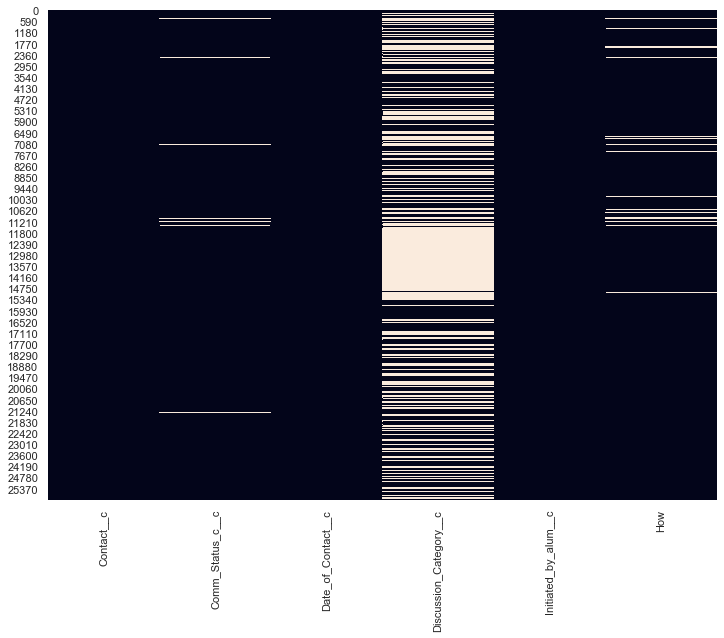

In [8]:
# check nulls
sns.set(rc={'figure.figsize':(12,9)}) # adjust figure size
sns.heatmap(contactNote.isnull(), cbar=False)

In [9]:
total = contactNote.isnull().sum().sort_values(ascending=False)
percent = (contactNote.isnull().sum()/contactNote.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total Missing', 'Percent'])
missing_data

,Total Missing,Percent
Discussion_Category__c,12524,0.482676
How,1020,0.039311
Comm_Status_c__c,492,0.018962
Initiated_by_alum__c,0,0.000000
Date_of_Contact__c,0,0.000000
Contact__c,0,0.000000


In [10]:
contactNote['Contact__c'].nunique()

1192

In [11]:
# check unique values for each column
contactNote['Comm_Status_c__c'].value_counts(sort=True)

Successful communication       17329
Informational Outreach only     6603
Unsuccessful communication      1523
Name: Comm_Status_c__c, dtype: int64

In [12]:
# contactNote['Discussion_Category__c'].unique()
# contactNote['Initiated_by_alum__c'].unique()
# contactNote['How'].unique()
# note: for the column 'How ', there is a space in the end. 
# If you returned an error, check the column name

### First try

- remove Unsuccessful communication & nulls
- keep both contacts initiated by either fellow or coach

In [13]:
df_first = contactNote[(contactNote['Comm_Status_c__c'] == 'Successful communication')  | (contactNote['Comm_Status_c__c'] == 'Informational Outreach only')]

In [14]:
df_first.shape

(23932, 6)

In [15]:
df_first_days = df_first.groupby('Contact__c')['Date_of_Contact__c'].apply(lambda x: x.sort_values()).diff().reset_index() 

In [16]:
df_temp = df_first_days.head(40).drop(['level_1'], axis=1)
df_temp

,Contact__c,Date_of_Contact__c
0,00346000002iW9lAAE,NaT
1,00346000002iW9lAAE,18 days
2,00346000002iW9lAAE,339 days
3,00346000002iW9lAAE,46 days
4,00346000002iW9lAAE,2 days
5,00346000002iW9lAAE,58 days
6,00346000002iW9lAAE,6 days
7,00346000002iW9lAAE,27 days
8,00346000002iW9lAAE,13 days
9,00346000002iW9lAAE,155 days


In [17]:
# the first one is the only NULL
df_first_days['Date_of_Contact__c'].isna().sum()

1

In [18]:
# change the first value to a big negative value (does not affect later)
df_first_days['Date_of_Contact__c'][0] = pd.to_timedelta(-1000, unit='D')

In [19]:
# change time delta to integer (for later calculate)
df_first_days['Date_of_Contact__c'] = pd.to_numeric(df_first_days['Date_of_Contact__c'].dt.days, downcast='integer')

In [63]:
df_first_days.head()

,Contact__c,level_1,Date_of_Contact__c
0,00346000002iW9lAAE,1215,-1000
1,00346000002iW9lAAE,1216,18
2,00346000002iW9lAAE,1220,339
3,00346000002iW9lAAE,1213,46
4,00346000002iW9lAAE,1209,2


In [64]:
# remove negative numbers (those numbers are the first row/contact of each student)
df_first_days = df_first_days[df_first_days['Date_of_Contact__c'] > 0]

In [65]:
# the median of days between two contacts of each student
df_first_median_days = pd.DataFrame(df_first_days.groupby('Contact__c')['Date_of_Contact__c'].median()).reset_index()
df_first_median_days.head()

,Contact__c,Date_of_Contact__c
0,00346000002iW9lAAE,33.0
1,00346000002iW9mAAE,44.5
2,00346000002iW9nAAE,30.0
3,00346000002iW9oAAE,75.0
4,00346000002iW9pAAE,36.0


In [66]:
# rename column name for further merge
df_first_median_days.rename(columns={'Contact__c':'Id','Date_of_Contact__c':'days_diff'}, inplace=True)

In [67]:
# merge
# get a new dataframe with labels
df_first_median_days_with_labels = df_first_median_days.merge(label, on='Id', how='inner')

In [68]:
df_first_median_days_with_labels.head()

,Id,days_diff,label
0,00346000002iW9lAAE,33.0,0
1,00346000002iW9mAAE,44.5,0
2,00346000002iW9nAAE,30.0,1
3,00346000002iW9oAAE,75.0,1
4,00346000002iW9pAAE,36.0,1


In [69]:
# we finally get 677 students with labels
df_first_median_days_with_labels.shape

(677, 3)

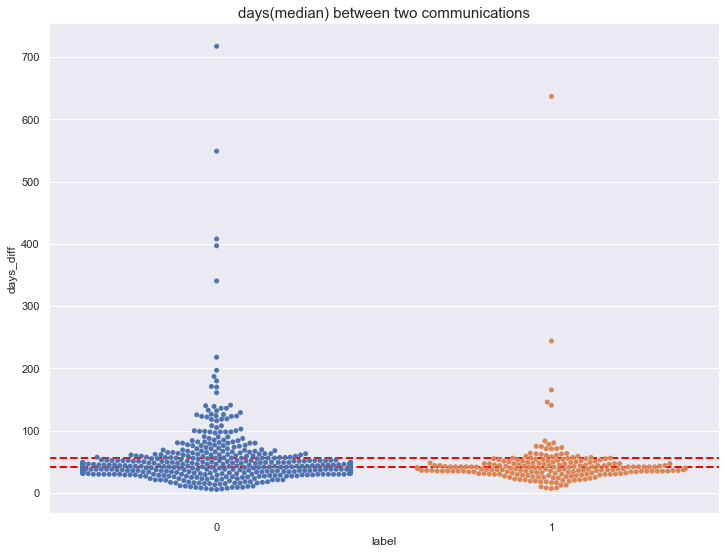

In [70]:
sns.swarmplot('label', 'days_diff', data=df_first_median_days_with_labels)
plt.axhline(42, ls='--', linewidth=2, color='red')
plt.axhline(56, ls='--', linewidth=2, color='red')
plt.title("days(median) between two communications", fontsize= 15)
sns.despine()

### Second try

- remove Unsuccessful communication
- remove contacts initiated by advisee

In [71]:
df_second = contactNote[((contactNote['Comm_Status_c__c'] == 'Successful communication')|(contactNote['Comm_Status_c__c'] == 'Informational Outreach only')) & (contactNote['Initiated_by_alum__c'] == 0)]

In [72]:
df_second.shape

(20285, 6)

In [73]:
df_second_days = df_second.groupby('Contact__c')['Date_of_Contact__c'].apply(lambda x: x.sort_values()).diff().reset_index() 

In [74]:
df_second_days.head()

,Contact__c,level_1,Date_of_Contact__c
0,00346000002iW9lAAE,1215,NaT
1,00346000002iW9lAAE,1216,18 days
2,00346000002iW9lAAE,1213,385 days
3,00346000002iW9lAAE,1209,2 days
4,00346000002iW9lAAE,1207,58 days


In [75]:
# the first one is the only NULL
df_second_days['Date_of_Contact__c'].isna().sum()

1

In [76]:
# change the first value to a big negative value (does not affect later)
df_second_days['Date_of_Contact__c'][0] = pd.to_timedelta(-1000, unit='D')

In [77]:
# change time delta to integer (for later calculate)
df_second_days['Date_of_Contact__c'] = pd.to_numeric(df_second_days['Date_of_Contact__c'].dt.days, downcast='integer')

In [78]:
df_second_days.head()

,Contact__c,level_1,Date_of_Contact__c
0,00346000002iW9lAAE,1215,-1000
1,00346000002iW9lAAE,1216,18
2,00346000002iW9lAAE,1213,385
3,00346000002iW9lAAE,1209,2
4,00346000002iW9lAAE,1207,58


In [79]:
# remove negative numbers (those numbers are the first row/contact of each student)
df_second_days = df_second_days[df_second_days['Date_of_Contact__c'] > 0]

In [80]:
# the median of days between two contacts of each student
df_second_median_days = pd.DataFrame(df_second_days.groupby('Contact__c')['Date_of_Contact__c'].median()).reset_index()
df_second_median_days.head()

,Contact__c,Date_of_Contact__c
0,00346000002iW9lAAE,33.0
1,00346000002iW9mAAE,44.5
2,00346000002iW9nAAE,35.0
3,00346000002iW9oAAE,76.0
4,00346000002iW9pAAE,36.0


In [81]:
# rename column name for further merge
df_second_median_days.rename(columns={'Contact__c':'Id','Date_of_Contact__c':'days_diff'}, inplace=True)

In [82]:
# merge
# get a new dataframe with labels
df_second_median_days_with_labels = df_second_median_days.merge(label, on='Id', how='inner')

In [83]:
# we finally get 677 students with labels
df_second_median_days_with_labels.shape

(677, 3)

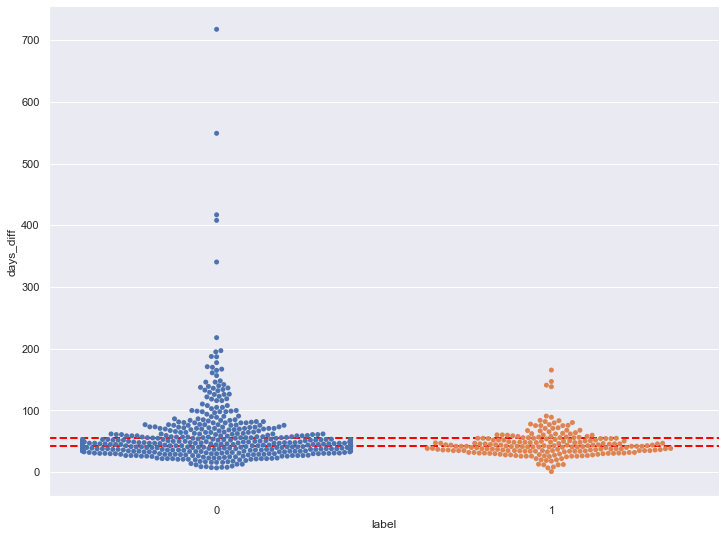

In [84]:
sns.swarmplot('label', 'days_diff', data=df_second_median_days_with_labels)
plt.axhline(42, ls='--', linewidth=2, color='red')
plt.axhline(56, ls='--', linewidth=2, color='red')
sns.despine()

### Check correlation

In [85]:
df.head()

,Id,College_Credits_Accumulated__c,Cumulative_College_GPA__c,Total_Credits_Required_to_Graduate__c,Pell_Eligible__c,HS_Final_GPA__c,Highest_ACT_Score__c,First_Generation_College_Student__c,Gender__c,EFC_from_FAFSA__c,Career_Path__c,College_Path__c,Active_T_Mobile_Plan__c,label
0,00346000002iXekAAE,48.0,2.29,120.0,0,3.33,25.0,0,1.0,1264.0,0,1,1.0,0
1,00346000002iXcbAAE,6.0,1.10,120.0,0,1.98,13.0,0,0.0,0.0,1,0,0.0,0
2,00346000002iXbiAAE,39.0,1.92,120.0,0,2.50,18.0,0,1.0,24170.0,1,0,0.0,0
3,00346000002iXaSAAU,108.0,3.51,120.0,0,2.87,20.0,0,0.0,0.0,0,1,1.0,1
4,00346000002iXaWAAU,124.0,2.51,120.0,0,2.46,21.0,0,1.0,0.0,0,1,0.0,1


In [86]:
#merge
#get a new dataframe with labels
df = df.merge(df_first_median_days_with_labels, on='Id', how='inner')

In [87]:
del df['label_x']
df.rename(columns = {'label_y':'label'}, inplace = True)

In [88]:
# 427 students with labels left
df.shape

(427, 15)

In [89]:
df.head()

,Id,College_Credits_Accumulated__c,Cumulative_College_GPA__c,Total_Credits_Required_to_Graduate__c,Pell_Eligible__c,HS_Final_GPA__c,Highest_ACT_Score__c,First_Generation_College_Student__c,Gender__c,EFC_from_FAFSA__c,Career_Path__c,College_Path__c,Active_T_Mobile_Plan__c,days_diff,label
0,00346000002iXekAAE,48.0,2.29,120.0,0,3.33,25.0,0,1.0,1264.0,0,1,1.0,85.0,0
1,00346000002iXcbAAE,6.0,1.10,120.0,0,1.98,13.0,0,0.0,0.0,1,0,0.0,40.0,0
2,00346000002iXbiAAE,39.0,1.92,120.0,0,2.50,18.0,0,1.0,24170.0,1,0,0.0,42.0,0
3,00346000002iXaSAAU,108.0,3.51,120.0,0,2.87,20.0,0,0.0,0.0,0,1,1.0,37.0,1
4,00346000002iXaWAAU,124.0,2.51,120.0,0,2.46,21.0,0,1.0,0.0,0,1,0.0,73.0,1


(14.5, -0.5)

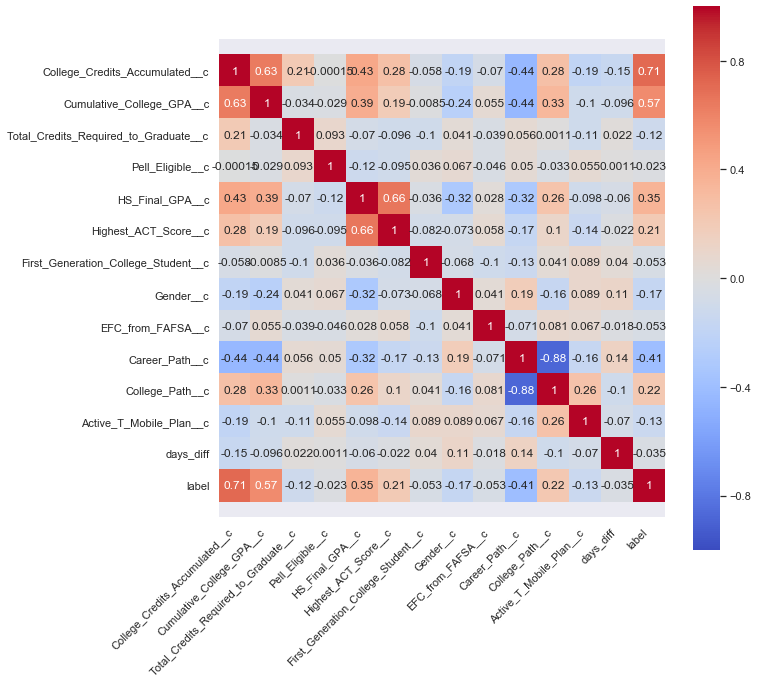

In [90]:
# Correlations
corr = df.corr()

f, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap="coolwarm",
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

**conclusion:**
**contact interval has little correlation with students' success/persistence**

In [91]:
corr1 = df[['days_diff', 'label']].corr()

In [92]:
corr1

,days_diff,label
days_diff,1.000000,-0.035194
label,-0.035194,1.000000
